In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#Autores: Daniela Fabrega, Felipe Saldias


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from camera import CameraReader, display_frame
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import sys
import time
import numpy
import scipy.signal
from scipy import fftpack
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from bitarray import bitarray
#from style import *

plt.rcParams['image.cmap'] = 'gray'


<IPython.core.display.Javascript object>


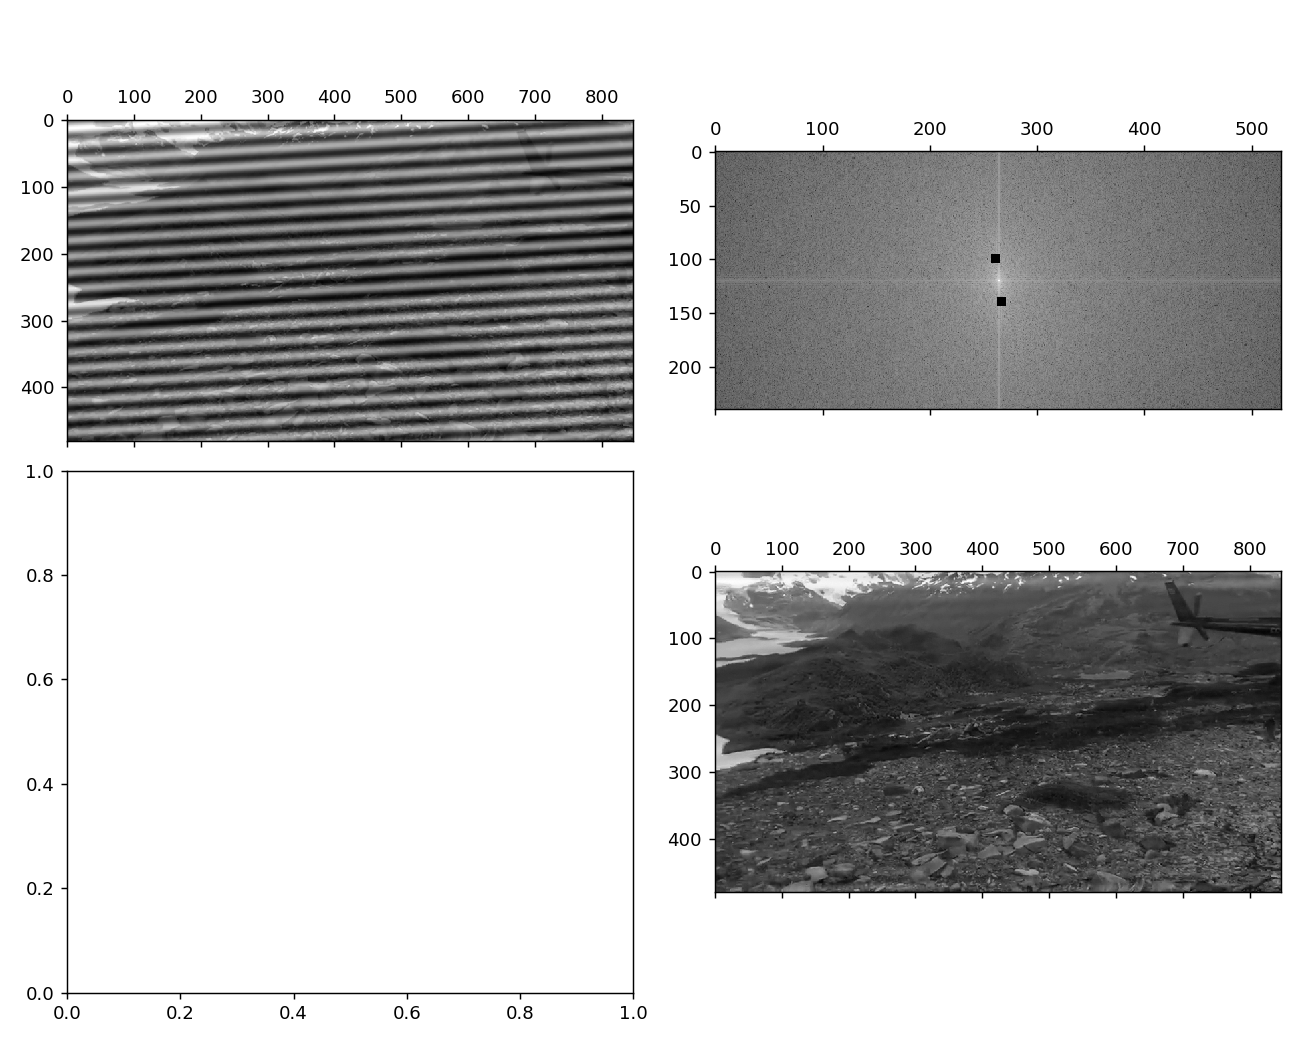

array([[186, 186, 186, ..., 117, 117, 117],
       [183, 182, 183, ..., 153, 152, 152],
       [180, 180, 180, ..., 168, 168, 168],
       ...,
       [100, 100, 100, ...,  91, 100, 110],
       [102, 102, 102, ..., 106, 113, 115],
       [103, 104, 103, ..., 117, 123, 119]], dtype=uint8)

In [33]:
conteo=np.zeros((256,1))
#conteo2=np.zeros((256,1))
fig, ax = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True);
def limpia(frame):
    #print(type(frame[0,0]));
    frequency=20
    size=4;
    des=3
    ax[0, 0].matshow(frame);
    S_img = fftpack.fftshift(fftpack.fft2(frame))
    S_img[240-size-frequency:240+size-frequency, 424-size-des:424+size-des] = 0 
    S_img[240-size+frequency:240+size+frequency, 424-size+des:424+size+des] = 0 
    
    ax[0, 1].matshow(np.log(1+np.abs(S_img))[120:-120, 160:-160])
    ax[1, 1].matshow(np.mean(frame) + np.abs(fftpack.ifft2(fftpack.ifftshift(S_img))),)
    
    return (np.abs(fftpack.ifft2(fftpack.ifftshift(S_img)))).astype(np.uint8)#.astype(int)
limpia(frame)
#frame2= limpia(frame)
#print(type(frame2[0,0]))

#se encarga contar los frames en brutos, y graficarlos, una vez que se ejecuta este bloque la matriz conteo
#queda cuantizada y no podra obtener los mismos resultados de la primera vez 
#echamos a correr el codigo para ver como funcionaba lal shit

In [24]:
def cuenta(frame):
    global conteo
    for i in range(480):
        for j in range(848):
            #print(frame[i,j])
            conteo[frame[i,j],0]=conteo[frame[i,j],0]+1
            

def cuantiza(frame):
    cantidadIntervalos=32
    largoIntervalo=int(256/cantidadIntervalos)
    global conteo
    frame=((1/largoIntervalo)*frame).astype(int)
    return (frame*largoIntervalo).astype(np.uint8)
    

In [25]:
#CODIFICACION
huffman_dict = {
    'a': bitarray('11'), 'b': bitarray('101'),
    'c': bitarray('100'), 'd': bitarray('011'),
    'e': bitarray('010'), 'f': bitarray('0011'),
    'g': bitarray('00101'),'h': bitarray('00100'),
    'i': bitarray('000111'),'j': bitarray('000110'),
    'k': bitarray('000101'),'l': bitarray('000100'),
    'm': bitarray('000011'),'n': bitarray('000010'),
    'o': bitarray('000001'),'p': bitarray('0000001'),
    'q': bitarray('00000001'),'r': bitarray('000000001'),
    's': bitarray('0000000001'),'t': bitarray('00000000001'),
    'u': bitarray('00000000000'),
}
                 #  0   1   2    3    4    5   6     7   8     9   10   11   12  13    14  15   16  17   18  19   20    
NUMEROS = np.array([80, 88, 96, 72, 104, 112, 120, 160, 152 ,128, 168, 144, 136, 176, 184, 64, 192, 200, 56, 208 ,48])
LETRAS = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i' ,'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't' ,'u'])

def codificacion (frame):
    fram = bitarray('')
    for i in range(480):
        for j in range(848):
            fram.encode(huffman_dict, LETRAS[np.where(NUMEROS== frame[i,j])])
    return fram

#%time codificacion(frame)

def decodificador(palabrabits):
    dec = palabrabits.decode(huffman_dict)
    imagen = np.zeros((480,848))
    for i in range(407040):
        imagen[int(i/848),i%848]=NUMEROS[np.where(LETRAS == dec[i])]
    
    return imagen
    






In [26]:
%%time
cam = CameraReader()
cantidadFrames=np.zeros((900,1))

vid_height, vid_width = cam.get_resolution()
print("Resolución del video: {0}x{1}p".format(vid_width, vid_height))
print("Cuadros por segundo: {0}".format(cam.get_fps()))

out = widgets.Image(layout=widgets.Layout(width=str(vid_width), 
                                          height=str(vid_height)))
display(out)
contador = 0
for frame in cam:
    # Implemente una función que limpie los frames
    # frame_limpio = eliminar_ruido(frame)
    # print(sys.getsizeof(frame_limpio))  #getsizeof retorna el tamaño en Bytes
    
    frame_limpio=limpia(frame).astype(np.uint8)
    #cuenta(frame)
    
    #cuenta(frame_cuantizado)
    
    
    
    
    # Implemente una función que comprima los frames
    # frame_comprimido = comprimir(frame)                   # limite impuesto
    # print(sys.getsizeof(frame_comprimido))
    
    
    
    
    
    
    #frame_cuantizado=cuantiza(frame_limpio).astype(np.uint8)
    #cuenta(frame_cuantizado)
    #tiraBits=codificacion(frame_cuantizado)
    #cantidadFrames[contador,0]=len(tiraBits)
    
    
    
    
    
    
    # Implemente una función que descomprima los frames
    # frame = descomprimir(frame_compromido)
    ##print(cam.error(frame))  # Error de compresión
    
    #frame_deco=decodificador(tiraBits).astype(np.uint8)
    #print(cam.error(frame_deco))  # Error de compresión
    
    
    
    
    contador = contador+1
    
    
    #display_frame(out, frame_deco)
    display_frame(out, frame_deco)
   # frame = ffttypack.fftshift(np.log(1.+np.abs(fftpack.fft2(frame))))
   # display(frame);
    #display_frame(out, frame)
    #time.sleep(1)
    #ax.matshow(frame)
    
    # input("Press Enter to continue...")
#type(frame)    
   

Iniciando lector de camara
OpenCV version: major: 3, minor: 4, subminor: 2
Resolución del video: 848x480p
Cuadros por segundo: 29.97002997002997


Exception ignored in: <function CameraReader.__del__ at 0x7f4968c5a9d8>
Traceback (most recent call last):
  File "/home/felipe/Escritorio/COM_CIEN/TAREA_1COM/practico1_INFO185/camera.py", line 79, in __del__
    cv2.destroyAllWindows()
cv2.error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:626: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'



Image(value=b'', layout="Layout(height='480', width='848')")

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


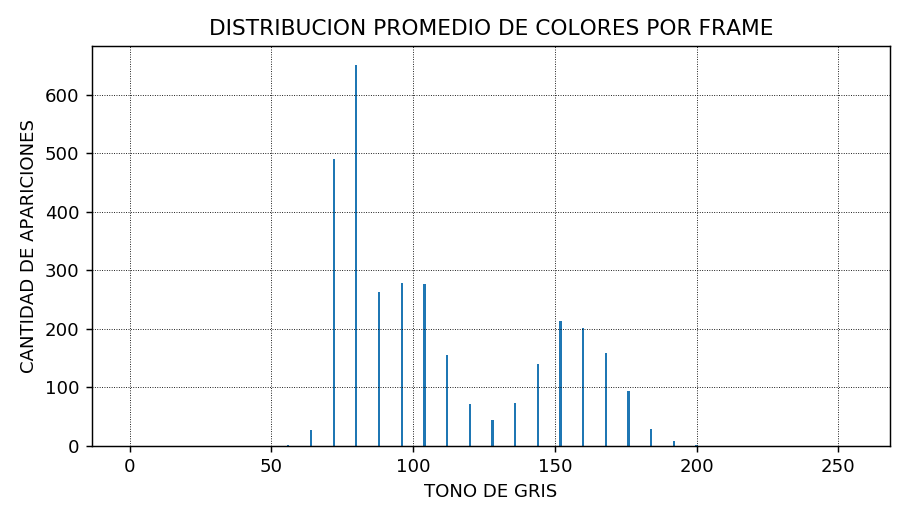

In [8]:
#Hace grafico de barra
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

#ax.hist((conteo[:,0]), bins=None, range=None, density=None, weights=None, 
        #histtype='bar', color=None);
ax.bar(range(len(conteo[:,0])),conteo[:,0]/900)
ax.set_title('DISTRIBUCION PROMEDIO DE COLORES POR FRAME')
ax.set_xlabel('TONO DE GRIS', )
ax.set_ylabel('CANTIDAD DE APARICIONES')
ax.grid(color="black", which="major", axis='both', linestyle=':', linewidth=0.5)
#Cantidad total de pixeles por frame: 407.040
#Frames del video: 900

#Colores van de 52 a 212 en promedio





In [19]:
print("CANTIDAD DE BIT PROMEDIOS POR FRAME:",cantidadFrames.mean())
#1433094.9088888888
factor=8*10**6
print("CANTIDAD DE MB POR FRAME:",(cantidadFrames.mean()/factor)) #5.0158321811111115
print("Velocidad internet necesaria o mb por segundo de video:",(28*cantidadFrames.mean()/factor))


CANTIDAD DE BIT PROMEDIOS POR FRAME: 10233.304444444444
CANTIDAD DE MB POR FRAME: 0.0012791630555555554
Velocidad internet necesaria o mb por segundo de video: 0.035816565555555555


https://stackoverflow.com/questions/33089660/decoding-a-huffman-code-with-a-dictionary
https://riptutorial.com/es/algorithm/example/23995/codificacion-huffman
https://pypi.org/project/bitarray/
